<a href="https://colab.research.google.com/github/IamODJ/EE_Project/blob/main/DA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Course Project Report- Data Analysis**
##**Covid-19 : A Pandemic Analysis** 

**Team Members:**

Pratik Jain (190010034) 

G O Amrutha Praveen ()

Rajeshwari D ()

Vansh Gupta ()

Omkar D Jadhav (190010029)

Manoj Mahawar ()



Problem Statement : To
   1. Collect
   2. Analyze
   3. Represent
   4. Interpret

the data for COVID-19 from different datasets.

##**Introduction**
The COVID-19 pandemic, is an ongoing pandemic of coronavirus disease 2019 (COVID-19) caused by the transmission of severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first detected in China, Wuhan during December 2019 and within an year it has been declared as a worldwide pandemic. 



##**1.Data Collection**

We have used various datasets accross multiple sources throughout the internet. Since the disease has been declared as a pandemic, there are multiple sources which collect the data independently to study the nature of the spread of disease. We have tried to use those datasets with which we could generate out data plots readily without additional efforts of structuring the dataset. The sources to datasets are as follows:

1. ArcGIS REST Services Directory: [https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/](https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/)

2. WHO Repository: [https://covid19.who.int/](https://covid19.who.int/)

3. Dataset shared by Devakumar kp on Kaggle [https://www.kaggle.com/imdevskp/corona-virus-report](https://www.kaggle.com/imdevskp/corona-virus-report)

4. Dataset from Ourworldindata.org repository:  [https://ourworldindata.org/coronavirus-source-data](https://ourworldindata.org/coronavirus-source-data)

We had to refer a few more sources for hypothesis analysis which have been listed below:

TODO Add sources

##**2.Analysis and 3.Representations**

Before making a hypotesting and testing it, let us analyse the current picture of CoVID-19 World-wide. We will use python to generate plots and make calculations regarding hypothesis later. Python has various inbuilt libraries for plotting and Data Science purposes.

We have used various plots to represent our data, like bar graphs, line graphs, pie charts, box plots to Represent the data. We will try to infer something from each plot and later make a detailed hypothesis and test it.

COVID-19 Worldwide statistics:

Importing the python packages we'll need for the same


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import plotly.graph_objects as go
import datetime as dt
import requests
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Retreiving the dataset from the hosted location and populating the dataframe.

In [58]:
url_request = requests.get(
    "https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json")
url_json = url_request.json()
df = pd.DataFrame(url_json['features'])
df['attributes'][0]

data_list = df['attributes'].tolist()
data = pd.DataFrame(data_list)
data.set_index('OBJECTID')
data = data[['Province_State', 'Country_Region', 'Last_Update',
             'Lat', 'Long_', 'Confirmed', 'Recovered', 'Deaths', 'Active']]
data.columns = ('State', 'Country', 'Last Update', 'Lat',
                'Long', 'Confirmed', 'Recovered', 'Deaths', 'Active')
data['State'].fillna(value='', inplace=True)

def convert_time(t):
    t = int(t)
    return dt.datetime.fromtimestamp(t)


data = data.dropna(subset=['Last Update'])
data['Last Update'] = data['Last Update']/1000
data['Last Update'] = data['Last Update'].apply(convert_time)
data


,State,Country,Last Update,Lat,Long,Confirmed,Recovered,Deaths,Active
0,,Afghanistan,2020-12-11 13:28:00,33.939110,67.709953,48116,38141,1945,8030
1,,Albania,2020-12-11 13:28:00,41.153300,20.168300,46061,23609,965,21487
2,,Algeria,2020-12-11 13:28:00,28.033900,1.659600,90579,59135,2564,28880
3,,Andorra,2020-12-11 13:28:00,42.506300,1.521800,7190,6505,78,607
4,,Angola,2020-12-11 13:28:00,-11.202700,17.873900,15925,8679,362,6884
...,...,...,...,...,...,...,...,...,...
757,Ohio,US,2020-12-11 13:28:00,40.388783,-82.764915,531850,0,7298,524552
758,Alabama,US,2020-12-11 13:28:00,32.318200,-86.902300,284922,0,4034,280888
759,North Carolina,US,2020-12-11 13:28:00,35.630066,-79.806419,416083,0,5714,410369
760,District of Columbia,US,2020-12-11 13:28:00,38.897438,-77.026817,24098,0,708,23390


First plot: Top 7 countries in the world with confirmed cases. (**Note**:since we are using a hosted dataset, it is updated daily. Accordingly the values might differ when this python notebook is run in future)

In [59]:
top7_confirmed = pd.DataFrame(data.groupby(
    'Country')['Confirmed'].sum().nlargest(7).sort_values(ascending=True))
fig1 = px.bar(top7_confirmed, x=top7_confirmed.index, y='Confirmed',
                  color=top7_confirmed.index, title='Top 7 Confirmed Cases Countries worldwide')
fig1.show()

We chose to plot top 7 in the list expecting that we would see atleast one country from eac continent.Here we observe that all of the countries in the top 5 list are from different continents. It looks like the dominant countries from respective continents have been affected the most. Interestingly, China, where the first outbreak was observed is nowhere in this list. US is leading with over 15 M cases with cases over 7 times compared to France.

Second plot: Top 7 countries in the world with most death cases. (**Note**:
since we are using a hosted dataset, it is updated daily. Accordingly the values might differ when this python notebook is run in future)

In [60]:
top7_deaths = pd.DataFrame(data.groupby(
    'Country')['Deaths'].sum().nlargest(7).sort_values(ascending=False))
fig2 = px.bar(top7_deaths, x='Deaths', y=top7_deaths.index, height=600, color='Deaths', orientation='h',
              color_continuous_scale=['deepskyblue', 'red'], title='Top 10 Death Cases Countries')
fig2.show()


As expected, the same 7 countries in the previous plot are present here. The total number of deaths ratio between these countries roughly follows the same trend as in the case of total confirmed cases. We move to the next plot now where we see the countries leading with total number of recoveries.

Third plot: Top 7 countries in the world with most recovery cases. (**Note**: since we are using a hosted dataset, it is updated daily. Accordingly the values might differ when this python notebook is run in future)

In [61]:
top7_recovered = pd.DataFrame(data.groupby(
    'Country')['Recovered'].sum().nlargest(7).sort_values(ascending=True))
fig3 = px.bar(top7_recovered, x=top7_recovered.index, y='Recovered', height=600, color='Recovered',
              title='Top 7 Recovered Cases Countries', color_continuous_scale=px.colors.sequential.Viridis)
fig3.show()

Interestingly, though the number of confirmed cases is almost double for US compared to that of India, India leads the most recovered cases plot by a factor of approx (3/2) compared to the US. This shows that India has taken better measures than US to treat the patients who have tested positive already. However, We can't comment on this for sure without seeing the line graph with cumulative cases over time. It might be possible that US is witnessing recent upsurge in cases therefore those patients are yet to be treated.

Fourth plot: Top 7 countries in the world with most active cases. (**Note**: since we are using a hosted dataset, it is updated daily. Accordingly the values might differ when this python notebook is run in future)



In [62]:
top7_active = pd.DataFrame(data.groupby(
    'Country')['Active'].sum().nlargest(7).sort_values(ascending=False))
fig4 = px.bar(top7_active, x='Active', y=top7_active.index, height=600, color='Active', orientation='h',
              color_continuous_scale=['paleturquoise', 'blue'], title='Top 7 Active Cases Countries')
fig4.show()

This plot very well explains the previous plot as India is nowhere in the list. In the Indian context, most of the positive tested patients have already recovered. So is not the case with the US. This suggests the Pandemic entered US in a much later stage compared to India. All this would be clear once we see the Cumulative plots with timestamps associated with it.

Fifth and Sixth plots: As it might be evident already, We are looking at 2 countries very closely, India and the US since both of them were heavilty hit by the pandemic but US has struggled more when it comes to recovery of the patients. Let us look at what states in India and the US contribute to most total number of cases in the respective countries.

In [63]:
topstates_india = data['Country'] == 'India'
topstates_india = data[topstates_india].nlargest(7, 'Confirmed')

fig7 = go.Figure(data=[
    go.Bar(name='Recovered Cases',
           x=topstates_india['State'], y=topstates_india['Recovered']),
    go.Bar(name='Active Cases',
           x=topstates_india['State'], y=topstates_india['Active']),
    go.Bar(name='Death Cases',
           x=topstates_india['State'], y=topstates_india['Deaths'])
])
fig7.update_layout(title='Most Affected States in India',
                   barmode='stack', height=600)
fig7.show()

topstates_us = data['Country'] == 'US'
topstates_us = data[topstates_us].nlargest(7, 'Confirmed')

fig7 = go.Figure(data=[
    go.Bar(name='Recovered Cases',
           x=topstates_us['State'], y=topstates_us['Confirmed']-topstates_us['Active']-topstates_us['Deaths']),
    go.Bar(name='Active Cases',
           x=topstates_us['State'], y=topstates_us['Active']),
    go.Bar(name='Death Cases',
           x=topstates_us['State'], y=topstates_us['Deaths'])
])
fig7.update_layout(title='Most Affected States in US',
                   barmode='stack', height=600)
fig7.show()

Here we could see that for India in almost all 7 states, majority of the patients have recovered already. So is not the case for US. It currently has huge number of active cases in all of its states. Our dataset has a glitch due to which we are not able to capture the statewise data for number of recoveries in case of the US. Still it is evident from the number of active cases that the number of recoveries are very less.


Now we move towards the **line graphs**

For the same, we'll require a new dataset.

 https://covid19.who.int/ follow the link for this link for the next dataset(you can find the download option on the bottomright of the map chart)

**Cumulative cases**

In [64]:
# Cumulative cases
time_series = pd.read_csv('who_data.csv', encoding='ISO-8859-1')
print(time_series.columns.tolist())
time_series['Date_reported'] = pd.to_datetime(time_series['Date_reported'])

# a. Covid-19 cases worldwide
# Firsty Data
time_series_dates = time_series.groupby('Date_reported').sum()

['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']


In [65]:
# Cumulative cases
fig11 = go.Figure()
fig11.add_trace(go.Scatter(x=time_series_dates.index, y=time_series_dates['Cumulative_cases'], fill='tonexty',
                           line_color='red'))
fig11.update_layout(title='Cumulative Cases Worldwide')
fig11.show()

The above plot shows number of total cases worldwide against time.The cumulative cases worldwide are increasing at a tremendous pace and the plot is similar to exponential which is very alarming.The outbreak of coronavirus took place in the later half of March 2020 and has been increasing since then.


In [66]:
# Cumulative death cases
fig12 = go.Figure()
fig12.add_trace(go.Scatter(x=time_series_dates.index, y=time_series_dates['Cumulative_deaths'], fill='tonexty',
                           line_color='blue'))
fig12.update_layout(title='Cumulative Deaths Worldwide')
fig12.show()

The above plot shows Cumulative Deaths worldwide plotted against time.
It shows that during the initial phases i.e during the beginnning of March,the Deaths were low in number,however during may Covid-19 started to become more fatal and deaths started to rise rapidly.




**Daily New Cases**

In [67]:
fig13 = go.Figure()
fig13.add_trace(go.Scatter(x=time_series_dates.index, y=time_series_dates['New_cases'], fill='tonexty',
                           line_color='gold'))
fig13.update_layout(title='Daily New Cases Worldwide')
fig13.show()

The above graph shows Daily New Cases plotted against Time.
The very first outbreak was observed 13th February 2020 with 15,000 cases and then very few cases were observed until March 2020 end.Later the number of cases fluctuated in a short span but were however increasing in disguise.The biggest fall of 2,00,000 in daily cases was observed between 27th November and 1st December .

**Daily Death Cases**

In [68]:
# Daily death cases
fig14 = go.Figure()
fig14.add_trace(go.Scatter(x=time_series_dates.index, y=time_series_dates['New_deaths'], fill='tonexty',
                           line_color='hotpink'))
fig14.update_layout(title='Daily Death Cases Worldwide')
fig14.show()

The above graph shows Daily Deaths plotted against time.
The first death due to Covid-19 occured on 19th January ,2020. 12,510 people died on 17th April ,2020 which is the highest till date.Daily Deaths had reduced a bit during May-July period but increased again .

**Most Affected Countries Over Time**

In [69]:
# Data
# USA
time_series_us = time_series['Country'] == ('United States of America')
time_series_us = time_series[time_series_us]
# Brazil
time_series_brazil = time_series['Country'] == ('Brazil')
time_series_brazil = time_series[time_series_brazil]
# India
time_series_india = time_series['Country'] == ('India')
time_series_india = time_series[time_series_india]
# Russia
time_series_russia = time_series['Country'] == ('Russia')
time_series_russia = time_series[time_series_russia]


 **Cumulative Cases**

In [70]:
# Cumulative cases
fig15 = go.Figure()
fig15.add_trace(go.Line(
    x=time_series_us['Date_reported'], y=time_series_us['Cumulative_cases'], name='USA'))
fig15.add_trace(go.Line(x=time_series_brazil['Date_reported'],
                        y=time_series_brazil['Cumulative_cases'], name='Brazil'))
fig15.add_trace(go.Line(
    x=time_series_india['Date_reported'], y=time_series_india['Cumulative_cases'], name='India'))
fig15.add_trace(
    go.Line(x=time_series_russia['Date_reported'],
                        y=time_series_russia['Cumulative_cases'], name='Russia'))
fig15.update_layout(
    title="Time Series of Most Affected countries's Cumulative Cases")
fig15.show()

The above plot shows Cumulative Cases Country Wise against time.Covid-19 cases began to rise very early in USA followed by Brazil.However, Brazil controlled Covid-19 efficiently and during September India overtook Brazil with USA still having the maximum cases.USA has the Maximum number of cases till date.

**Cumulative Death Cases**

In [71]:
# Cumulative death cases
fig16 = go.Figure()
fig16.add_trace(go.Line(
    x=time_series_us['Date_reported'], y=time_series_us['Cumulative_deaths'], name='USA'))
fig16.add_trace(go.Line(x=time_series_brazil['Date_reported'],
                        y=time_series_brazil['Cumulative_deaths'], name='Brazil'))
fig16.add_trace(go.Line(
    x=time_series_india['Date_reported'], y=time_series_india['Cumulative_deaths'], name='India'))
fig16.add_trace(go.Line(x=time_series_russia['Date_reported'],
                        y=time_series_russia['Cumulative_deaths'], name='Russia'))
fig16.update_layout(
    title="Time Series of Most Affected countries's Cumulative Death Cases")
fig16.show()

The above plot shows Cumulative Deaths Country Wise against time.USA higher death rate the Brazil and India.Despite having more active cases in India than Brazil,fatality rate is less in India as compared to other counterparts.

**Daily New Cases**

In [72]:
# Daily new cases
fig17 = go.Figure()
fig17.add_trace(go.Line(
    x=time_series_us['Date_reported'], y=time_series_us['New_cases'], name='USA'))
fig17.add_trace(go.Line(
    x=time_series_brazil['Date_reported'], y=time_series_brazil['New_cases'], name='Brazil'))
fig17.add_trace(go.Line(
    x=time_series_india['Date_reported'], y=time_series_india['New_cases'], name='India'))
fig17.add_trace(go.Line(
    x=time_series_russia['Date_reported'], y=time_series_russia['New_cases'], name='Russia'))
fig17.update_layout(
    title="Time Series of Most Affected countries's Daily New Cases")
fig17.show()

The above graph shows Country Wise daily new cases against time.It is seen that India had left USA behind in daily cases during September however USA had a serious outbreak during November and during the same time ,daily cases in India were reducing which is a sign of hope.

**Daily death cases**

In [73]:
# Daily death cases
fig18 = go.Figure()
fig18.add_trace(go.Line(
    x=time_series_us['Date_reported'], y=time_series_us['New_deaths'], name='USA'))
fig18.add_trace(go.Line(
    x=time_series_brazil['Date_reported'], y=time_series_brazil['New_deaths'], name='Brazil'))
fig18.add_trace(go.Line(
    x=time_series_india['Date_reported'], y=time_series_india['New_deaths'], name='India'))
fig18.add_trace(go.Line(
    x=time_series_russia['Date_reported'], y=time_series_russia['New_deaths'], name='Russia'))
fig18.update_layout(
    title='Time Series of Most Affected countries"s Daily Death Cases')
fig18.show()

The above plot shows daily deaths plotted against time.The situation in USA was worst, i.e USA had a very high deaths during the start of Covid-19 pandemic.  On 17th June 2020,India registered 2003 deaths which is the highest in India.Now ,the deaths are reducing gradually which is a good news however deaths are increasing in USA.

###**Case Classification and Distribution:**


We collected dataset from https://www.kaggle.com/imdevskp/corona-virus-report for classification and distribution of cases .

**WHO Region-Wise Distribution**



In [74]:
who = pd.read_csv('country_wise_latest.csv')
who_region = pd.DataFrame(who.groupby('WHO Region')['Confirmed'].sum())
labels = who_region.index
values = who_region['Confirmed']

fig9 = go.Figure(
    data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0, 0, 0.2, 0])])
fig9.update_layout(title='WHO Region-Wise Case Distribution', width=700, height=400,
                   margin=dict(t=0, l=0, r=0, b=0))
fig9.show()

A pie chart as we know is a circular statistical graphic, which is divided into slices to illustrate numerical proportion.Here this chart shows the region wise distribution of number of cases Covid-19 . It is clearly visible from the chart that Americas region leads here with 53.6% of cases followed by Europe , then South-East Asia , then Eastern Mediterranean , then Africa and finally Western Pacific. 

 **Most Affected countries case distribution**

 

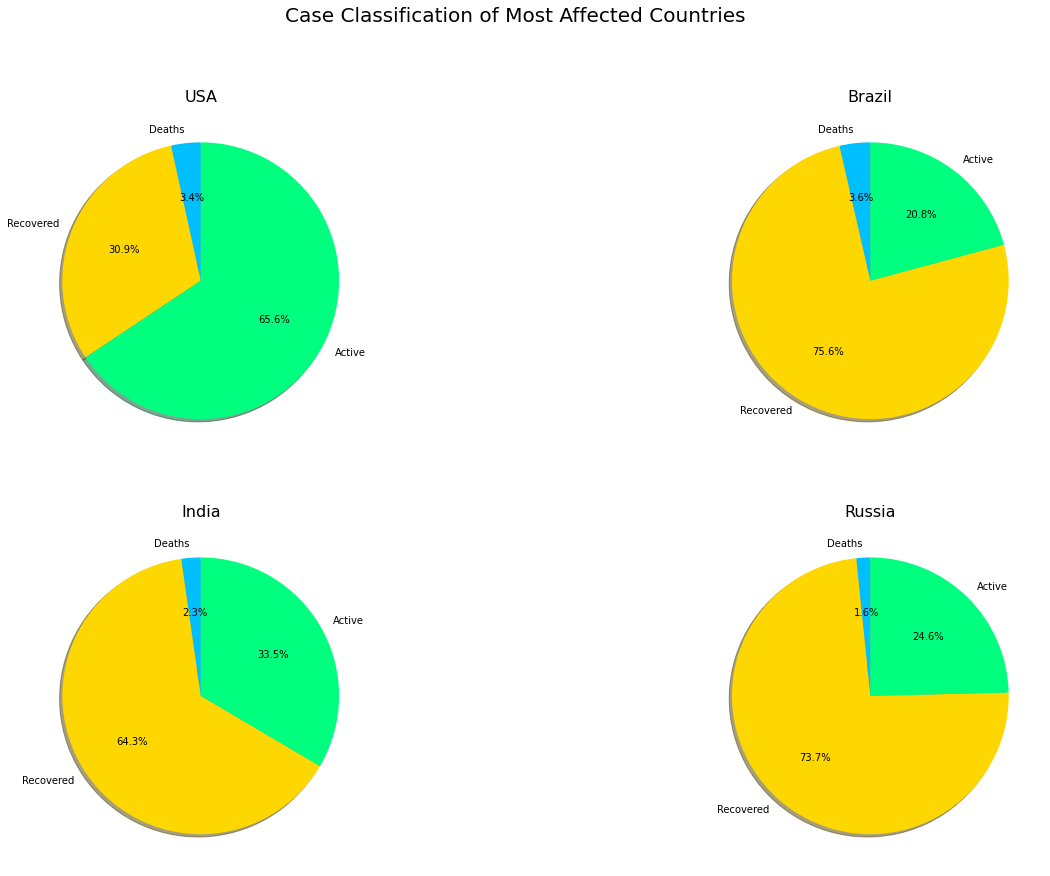

In [75]:

case_dist = who
# US
dist_us = case_dist['Country/Region'] == 'US'
dist_us = case_dist[dist_us][['Country/Region', 'Deaths',
                              'Recovered', 'Active']].set_index('Country/Region')
# Brazil
dist_brazil = case_dist['Country/Region'] == 'Brazil'
dist_brazil = case_dist[dist_brazil][[
    'Country/Region', 'Deaths', 'Recovered', 'Active']].set_index('Country/Region')
# India
dist_india = case_dist['Country/Region'] == 'India'
dist_india = case_dist[dist_india][[
    'Country/Region', 'Deaths', 'Recovered', 'Active']].set_index('Country/Region')
# Russia
dist_russia = case_dist['Country/Region'] == 'Russia'
dist_russia = case_dist[dist_russia][[
    'Country/Region', 'Deaths', 'Recovered', 'Active']].set_index('Country/Region')


fig = plt.figure(figsize=(22, 14))
colors_series = ['deepskyblue', 'gold', 'springgreen']
explode = (0, 0, 0.1)

plt.subplot(221)
plt.pie(dist_us.values.tolist()[0], labels=dist_us.columns.tolist(), colors=colors_series, explode=None, startangle=90,
        autopct='%.1f%%', shadow=True)
plt.title('USA', fontsize=16)

plt.subplot(222)
plt.pie(dist_brazil.values.tolist()[0], labels=dist_brazil.columns.tolist(), colors=colors_series, explode=None, startangle=90, autopct='%.1f%%',
        shadow=True)
plt.title('Brazil', fontsize=16)

plt.subplot(223)
plt.pie(dist_india.values.tolist()[0], labels=dist_india.columns.tolist(), colors=colors_series, explode=None, startangle=90, autopct='%.1f%%',
        shadow=True)
plt.title('India', fontsize=16)

plt.subplot(224)
plt.pie(dist_russia.values.tolist()[0], labels=dist_russia.columns.tolist(), colors=colors_series, explode=None, startangle=90,
        autopct='%.1f%%', shadow=True)
plt.title('Russia', fontsize=16)

plt.suptitle('Case Classification of Most Affected Countries', fontsize=20)
fig.savefig('1.png')



Here we have plotted pie charts for each of the top-4 most affected  countries classfying their cases.

From the pie chart of Brazil , we can observe that about three-fourth(about 75.6%) of the pie chart is sliced with yellow , meaning that they are recovered cases.Green slice is for active cases which is (20.8%) and rest (3.6%) are deaths.

It is clearly visible from pie chart of U.S. that about two-third (65.6% here) of cases are active cases .Most of the remaining (30.9%) are recovered .Rest (3.4%) are deaths .


It is clearly visible from pie chart of India that about two-third (64.3% here) of cases are recovered cases .Most of the remaining (33.5%) are active .Rest (2.3%) are deaths .

It is clearly visible from pie chart of Russia that about three-fourth (65.6% here) of cases are recovered cases .Most of the remaining (24.6%) are active .Rest (1.6%) are deaths .

From these pie charts , some peculiarities that we observe are that U.S. is the only country where green slice (active cases ) are larger than yellow slice(recovered cases) .This implies that recovery rate is slower in U.S. than other countries.Also all countries have blue slice (death rate) smaller than all other slices.This implies that death rate is consistent across all countries.



**Most affected continents' negative case vs positive case percentage composition**

For this composition we collected dataset from https://ourworldindata.org/coronavirus-source-data

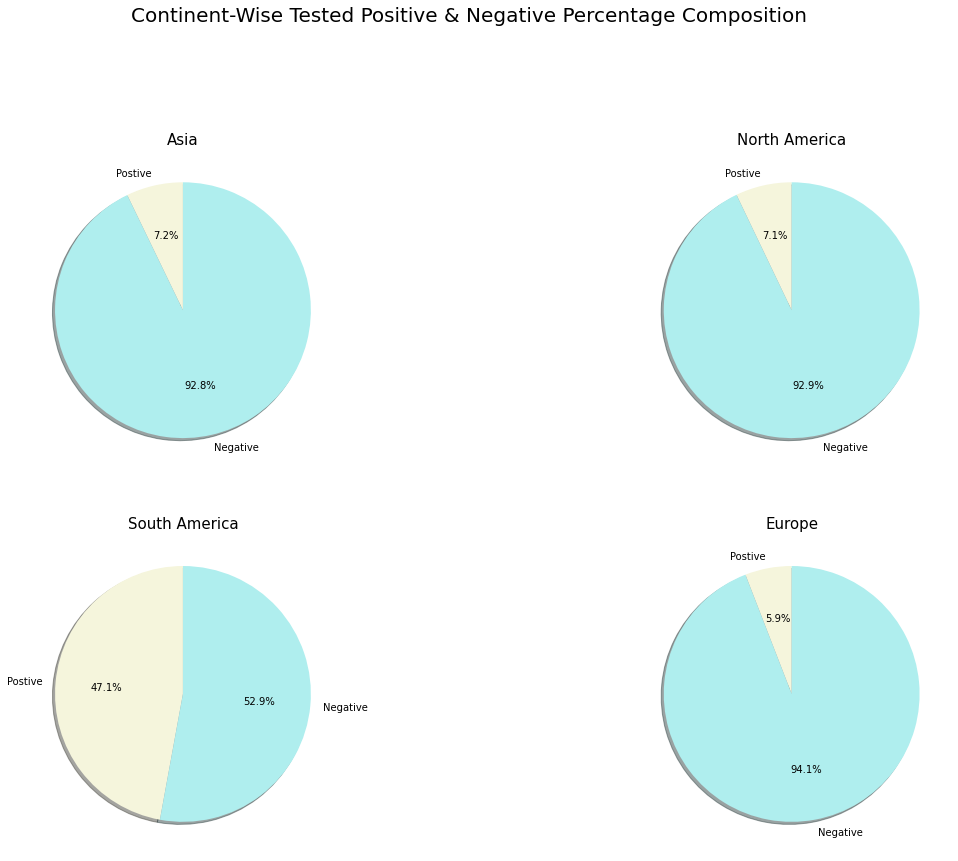

In [76]:
negative_positive = pd.read_csv('owid-covid-data.csv')
negative_positive = negative_positive.groupby(
    'continent')[['total_cases', 'total_tests']].sum()
explode = (0, 0.1)
labels = ['Postive', 'Negative']
colors = ['beige', 'paleturquoise']


fig = plt.figure(figsize=(20, 20))
plt.subplot(321)
plt.pie(negative_positive[negative_positive.index == 'Asia'].values.tolist()[0], labels=labels, explode=None, autopct='%.1f%%',
        startangle=90, colors=colors, shadow=True)
plt.title('Asia', fontsize=15)

plt.subplot(322)
plt.pie(negative_positive[negative_positive.index == 'North America'].values.tolist()[0], labels=labels, explode=None, autopct='%.1f%%',
        startangle=90, colors=colors, shadow=True)
plt.title('North America', fontsize=15)

plt.subplot(323)
plt.pie(negative_positive[negative_positive.index == 'South America'].values.tolist()[0], labels=labels, explode=None, autopct='%.1f%%',
        startangle=90, colors=colors, shadow=True)
plt.title('South America', fontsize=15)

plt.subplot(324)
plt.pie(negative_positive[negative_positive.index == 'Europe'].values.tolist()[0], labels=labels, explode=None, autopct='%.1f%%',
        startangle=90, colors=colors, shadow=True)
plt.title('Europe', fontsize=15)

plt.suptitle(
    'Continent-Wise Tested Positive & Negative Percentage Composition', fontsize=20)
fig.savefig('2.png')


Here we have plotted pie charts for positive and negative case percentage composition of continents.



From these pie charts , few peculiarities that we observe are :- South America is the only continent where Positive cases are significantly closer to negative cases in percent then in other continents.All continents have Positive cases less than negative cases.



##**4. Hypothesis testing**

After closely analysing the data given by the representations above, we state the following hypothesis which we would like to test.

1.

2.

3.

4.


##**Hypothesis 1**

**Climatic conditions affect the number of reported Covid-19 cases**

#**Comparison of the number of cases reported in India and America**


The two countries have entirely different climatic conditions.Therefore in the following hypothesis we
check the the effects of climatic conditions on the reported cases by comparing the mean of the cases
reported
since the samples are large so we use Z test


**Ho=There is no effect of climatic conditions on the number of case reported ( average of the cases
reported is same )**


**H1=There is effect of climatic conditions on the number of cases reported (average of the cases reported
is different )**

In [77]:
import pandas as pd
import datetime
import time 
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

df= pd.read_csv('who_data.csv', encoding = 'ISO-8859-1')
df1 = df[df['Country'].str.contains("India")]
df2 = df[df['Country'].str.contains("United States of America")]
pd.concat([df1['New_cases'],df2['New_cases']], axis=1).to_csv('compare_temp.csv',index=False)
print("Z-Test")
ztest ,pval1 = stests.ztest(df1['New_cases'], x2=df2['New_cases'], value=0,alternative='two-sided')
print('p-value = ',float(pval1))
if pval1<0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")
print("T-Test")
India_mean = np.mean(df1['New_cases'])
USA_mean = np.mean(df2['New_cases'])
print("India mean:",India_mean)
print("USA mean :",USA_mean)
India_std = np.std(df1['New_cases'])
USA_std = np.std(df2['New_cases'])
print("India std value:",India_std)
print("USA std value:",USA_std)
ttest,pval = ttest_ind(df1['New_cases'],df2['New_cases'])
print("p-value = ",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

Z-Test
p-value =  4.312403438084069e-06
we reject null hypothesis
T-Test
India mean: 28449.03244837758
USA mean : 41862.23598820059
India std value: 30531.5459450616
USA std value: 44125.19354439977
p-value =  5.1460317388030695e-06
we reject null hypothesis


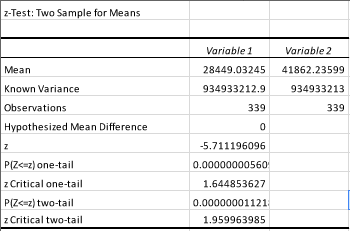

**In both the above test we reject null hypothesis**


**By which we can conclude that there are effects of climatic conditons**

##**Hypothesis 2**


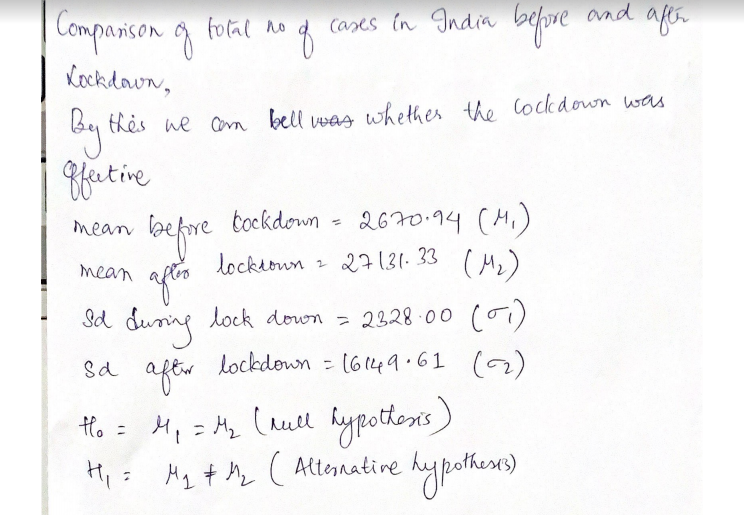

In [78]:
import pandas as pd
import datetime
import time 
import scipy
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind
import numpy as np
import math
df1= pd.read_csv('during.csv')
df2= pd.read_csv('aftlock.csv')
#print(df1['New_cases'])
#print(df2['New_cases'])
during_lockdown_mean = np.mean(df1['New_cases'])
after_lockdown_mean = np.mean(df2['New_cases'])
print("during lockdown mean :",during_lockdown_mean)
print("after lockdown mean :",after_lockdown_mean)
during_lockdown_std = np.std(df1['New_cases'])
after_lockdown_std = np.std(df2['New_cases'])
print("during lockdown sd value:",during_lockdown_std)
print("after lockdown sd value:",after_lockdown_std)
#z score calculation
#sample size = 68
n=math.sqrt(68)
z=(during_lockdown_mean-after_lockdown_mean)/((during_lockdown_std/n)+(after_lockdown_std/n))
print("Z = ",z)

during lockdown mean : 2670.9411764705883
after lockdown mean : 27131.33823529412
during lockdown sd value: 2328.002595525848
after lockdown sd value: 16149.615676186788
Z =  -10.916212169235298


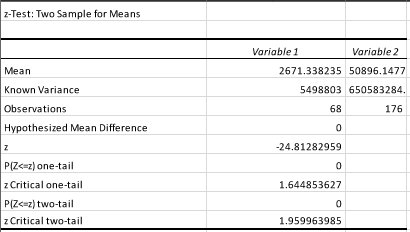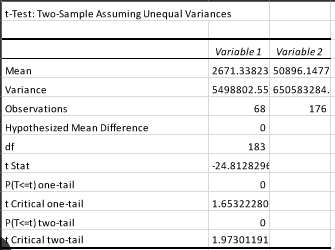

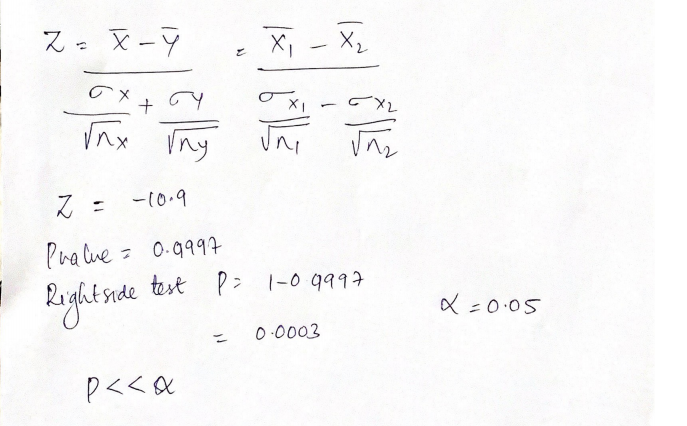

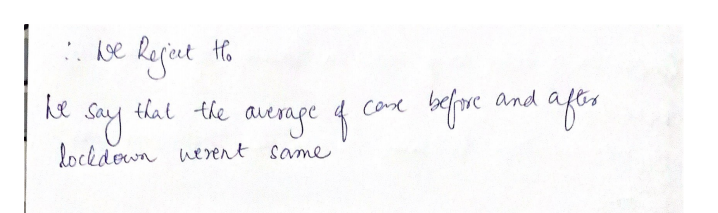

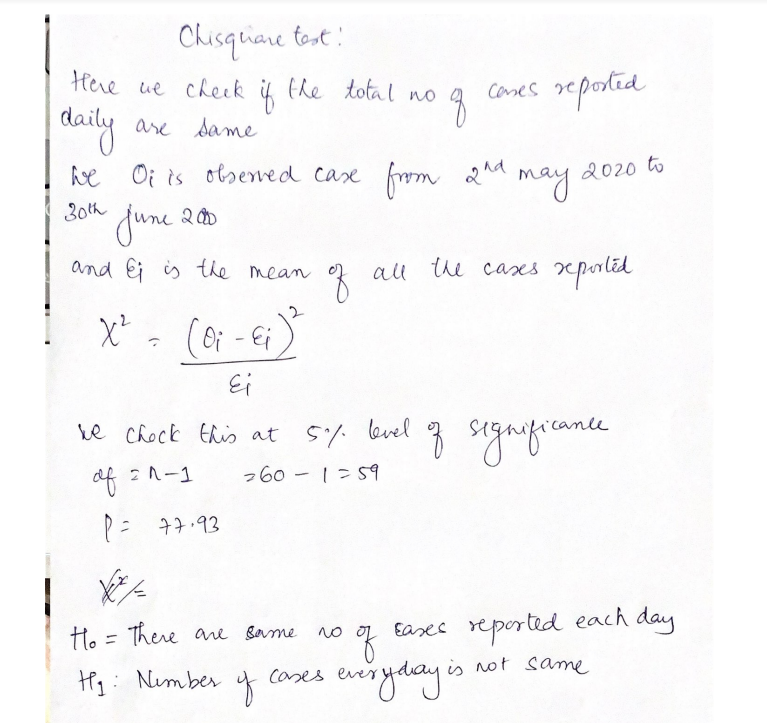

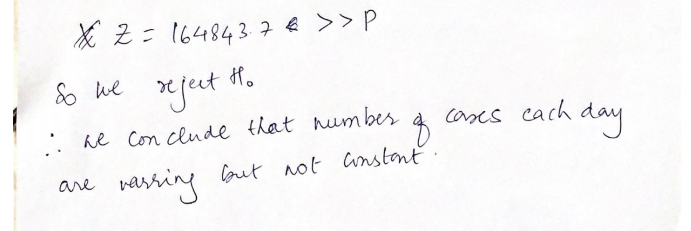

##**Hypothesis 3**

**To determine if there is a significant association between
Average temperature and the new cases reported in a day in
India.**

For this here we use a Chi-Square Test for independance.
The test is applied when you have two categorical variables
from a single population. It is used to determine whether
there is a significant association between the two variables.
For testing this the daily average temperature and daily new
cases reported in India from January 3 rd till May 12 th was
used.

**H0 : There is no relationship between Average temperature
and new cases reported in a day.**

**H1 : There is a relationship between Average temperature
and new cases reported in a day.**

In [79]:
import pandas as pd
import datetime
import time 
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind
import numpy as np
df= pd.read_csv('New_cases.csv', encoding = 'ISO-8859-1')
#print(df.columns.tolist())
#print(df1)
df2 = pd.read_csv('AvgTemperature.csv')
#df3 = df2[df2['Country'].str.contains("India")]
df3 = df2[df2['Country'].str.contains('India')]
#print(df['New_cases'],df3['AvgTemperature'])
pd.concat([df['New_cases'],df3['AvgTemperature']], axis=1).to_csv('chi-test.csv',index=False)
df_chi = pd.read_csv('chi-test.csv')
contingency_table=pd.crosstab(df["New_cases"],df_chi["AvgTemperature"])
print('contingency_table :-\n',contingency_table)#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between Average Temperature and New cases")
else:
    print("Retain H0,There is no relationship between Average Temperature and New cases")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between Average Temperature and New cases")
else:
    print("Retain H0,There is no relationship between Average Temperature and New cases")

contingency_table :-
 AvgTemperature  50.8  51.5  51.8  52.9  53.5  ...  88.1  88.2  89.2  89.9  92.3
New_cases                                     ...                              
0                  1     1     1     1     1  ...     0     0     0     0     0
1                  0     0     0     0     0  ...     0     0     0     0     0
2                  0     0     0     0     0  ...     0     0     0     0     0
3                  0     0     0     0     0  ...     0     0     0     0     0
5                  0     0     0     0     0  ...     0     0     0     0     0
...              ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
3390               0     0     0     0     0  ...     0     0     0     1     0
3561               0     0     0     0     0  ...     0     0     0     0     0
3604               0     0     0     0     0  ...     1     0     0     0     0
3900               0     0     0     0     0  ...     0     0     0     0     0
4213              

**Conclusion**:

From the data for the given period (03/01/2020 to
12/05/2020) there is no relationship between the average
temperature and new cases reported in a day.